Part 1

In [1]:
#Problem 1.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
G = 6.67*10**-11
#user should define the radius of the body when they want to find the potential as well, 
def V(M, R, xM, yM, x, y):
    r = np.sqrt((x-xM)**2 + (y - yM)**2)
    grav_potential = -G*M / r
    V = np.where(r < R, np.nan, grav_potential)
    return V

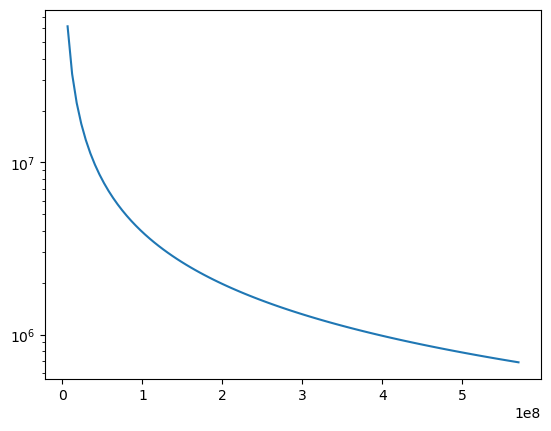

In [2]:
# Problem 2.)
earth_to_moon = 3.8 * 10**8 #given in meters
earth_radius = 6378*10**3
plotting_values = np.linspace(earth_radius, 1.5*earth_to_moon, 100)
earth_mass = 5.9*10**24
fig, ax = plt.subplots()
ax.plot(plotting_values, abs(V(earth_mass, earth_radius, 0, 0, plotting_values, np.zeros(100))))
ax.set_yscale('log')

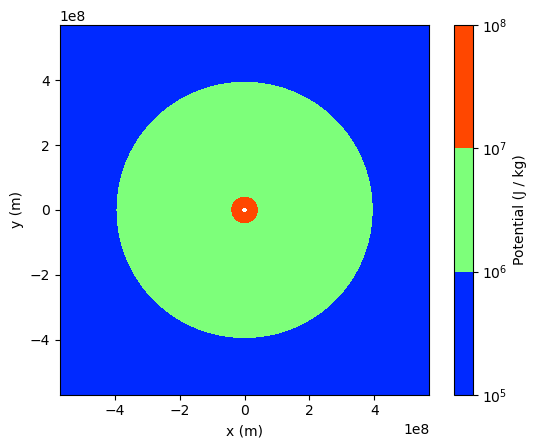

In [4]:
#Problem 3.)
fig, ax = plt.subplots()
x_vals = np.linspace(-1.5*earth_to_moon, 1.5*earth_to_moon, 200)
y_vals = np.linspace(-1.5*earth_to_moon, 1.5*earth_to_moon, 200)
x, y = np.meshgrid(x_vals, y_vals)
V_plot = abs(V(earth_mass, earth_radius, 0, 0, x, y))
contour = ax.contourf(x, y, V_plot, 1000, cmap = 'jet', norm = clrs.LogNorm())
cbar = fig.colorbar(contour)
cbar.set_label("Potential (J / kg)")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_aspect('equal')

Part 2

Text(0.5, 0.98, 'Potential of Earth Moon System')

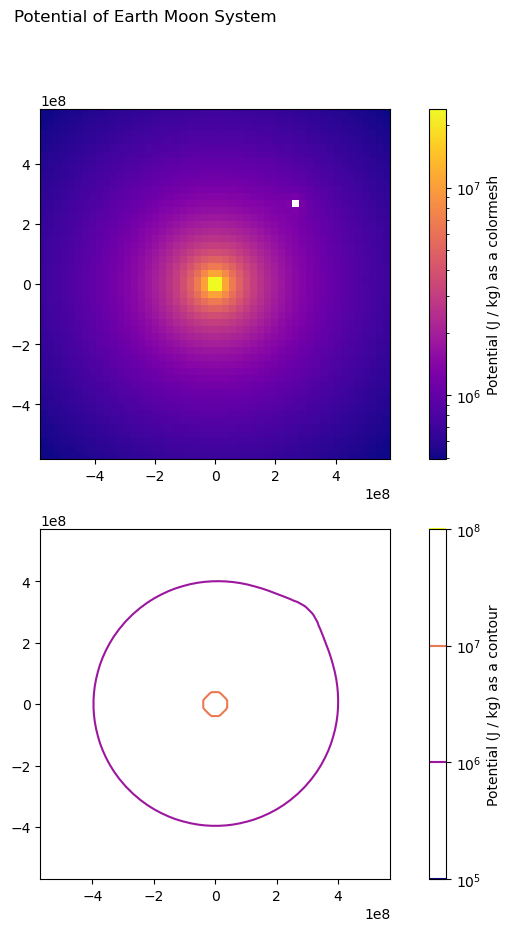

In [6]:
#Problem 1 and 2.)
#Earth Potential
moon_mass = 7.3*10**22
moon_radius = 1737 * 10**3
V_earth = V(earth_mass, earth_radius, 0, 0, x, y)
V_moon = V(moon_mass, moon_radius, earth_to_moon/np.sqrt(2), earth_to_moon/np.sqrt(2), x, y)
V_plot = abs(V_earth + V_moon)
fig, ax = plt.subplots(2, figsize = (10, 10))
ax1 = ax[0]
ax2 = ax[1]
contour = ax2.contour(x, y, V_plot, 100000, cmap = 'plasma', norm = clrs.LogNorm())
ax1.set_aspect('equal')
colormesh = ax1.pcolormesh(x, y, V_plot, cmap = 'plasma', norm = clrs.LogNorm())
ax2.set_aspect('equal')
cbar1 = fig.colorbar(colormesh, label = 'Potential (J / kg) as a colormesh')
cbar2 = fig.colorbar(contour, label = 'Potential (J / kg) as a contour')
fig.suptitle("Potential of Earth Moon System")

Part 3. 


In [5]:
#Problem 1.)
#It is much easier conceptually to write force as the negative gradient of the potential times m, so I'll just do that.
#nevermind prof. Teuben said to use the formula
def F(M, m, R, xM, yM, xm, ym):
    #compute the distance between two bodies
    r_square = (xm - xM)**2 + (ym - yM)**2
    theta = np.arctan2((ym-yM), (xm-xM))
    r_hat = [np.cos(theta), np.sin(theta)]
    F_scalar = - G * M * m / r_square
        Fx = np.where(r_square < R**2, np.nan, F_scalar * np.cos(theta))
    Fy = np.where(r_square < R**2, np.nan, F_scalar * np.sin(theta))
    return Fx, Fy


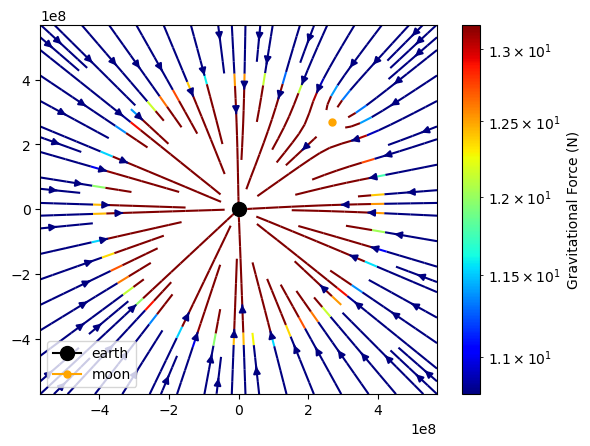

In [8]:
#Problem 2.)
#necessary new number
m_apollo = 5500
#generate your space
x_vals = np.linspace(-1.5 * earth_to_moon, +1.5 * earth_to_moon, 50)
y_vals = np.linspace(-1.5 * earth_to_moon, +1.5 * earth_to_moon, 50)
x, y = np.meshgrid(x_vals, y_vals)
#figure out the forces at play in your space
F_earth = F(earth_mass, m_apollo, earth_radius, 0, 0, x, y)
F_moon = F(moon_mass, m_apollo, moon_radius, earth_to_moon/np.sqrt(2), earth_to_moon/np.sqrt(2), x, y)
Fx_total = F_earth[0] + F_moon[0]
Fy_total = F_earth[1] + F_moon[1]
F_total = np.sqrt(Fy_total**2 + Fx_total **2)
#make your plot
fig, ax3 = plt.subplots()
streamplot1 = ax3.streamplot(x, y, Fx_total, Fy_total, color = F_total, cmap = 'jet', norm = clrs.LogNorm())
cbar = fig.colorbar(streamplot1.lines, label = 'Gravitational Force (N)', ax = ax3)
ax3.plot(0, 0, marker = 'o', color = 'black', ms = 10, label = 'earth')
ax3.plot(earth_to_moon/np.sqrt(2), earth_to_moon/np.sqrt(2), marker = 'o', color = 'orange', ms = 5, label = 'moon')
plt.legend(loc = 'lower left')

Part 4

In [9]:
#Problem 1.)
mf = 7.5 * 10 **5
mo = 2.8 * 10 **6
m_dot = 1.3 * 10 ** 4
T = (mo - mf) / m_dot
print("here is the burn time in seconds", T)

here is the burn time in seconds 157.69230769230768


In [357]:
#Problem 2.)
#to find delta v, the most obvious function we must first define is m(t)
g = 9.81
def delta_v(t, mo, mf, m_dot, v_e):
    m = mo - m_dot * t
    fxn = v_e * np.log(mo / m) - g * t
    np.where(m < mf, 0, fxn)
    return fxn

In [366]:
#Problem 3.)
from scipy.integrate import quad
mf = 7.5 * 10 **5
mo = 2.8 * 10 **6
m_dot = 1.3 * 10 ** 4
v_e = 2.4 * 10 ** 3

v = lambda t: delta_v(t, mo, mf, m_dot, v_e)
h = quad(v, 0, T)
print("here is the altitude of the rocket in meters:", h[0])

here is the altitude of the rocket in meters: 74093.98013366401
